In [2]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import math
from sklearn.metrics import mean_squared_error
from numpy import array
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import pearsonr, kurtosis, skew
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

# memprediksi target (close) 2 hari kedepan, dengan menggunakan data close dan open 7 hari sebelumnya

In [3]:
df =  pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
# fungsi sliding window
def sliding_window(data, window_size, step_size):
    X = []
    y = []
    for i in range(0, len(data) - window_size - step_size + 1):
        X.append(data[i:(i + window_size)])
        y.append(data[i + window_size + step_size - 1][1])  # Target is the Close price 
    return np.array(X), np.array(y)

In [5]:
def create_features(data, window_size):
    X = []
    for i in range(data.shape[0]):  # Iterate over the first dimension (data points)
        window = data[i, :, :]  # Extract a single window (2D) 
        open_prices = window[:, 0]
        close_prices = window[:, 1]

        # Calculate features for both open and close prices
        features = [
            np.mean(open_prices), np.std(open_prices), np.median(open_prices), 
            np.min(open_prices), np.max(open_prices), kurtosis(open_prices), skew(open_prices),
            np.mean(close_prices), np.std(close_prices), np.median(close_prices), 
            np.min(close_prices), np.max(close_prices), kurtosis(close_prices), skew(close_prices)
        ]

        X.append(features)

    return np.array(X)

In [6]:
# model untuk MLP (Multi Layer Perceptron)
def mlp_model(X_train, y_train, X_test, y_test):
    mlp = MLPRegressor(random_state=42, max_iter=1000)
    mlp.fit(X_train, y_train)
    # get the prediction
    y_pred = mlp.predict(X_test)
    y_pred = np.round(y_pred, 0)
    # get rmse
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    # get pearson correlation
    corr, _ = pearsonr(y_test, y_pred)
    # return rmse, correlation, and prediction
    return rmse, corr, y_pred

In [7]:
# model untuk KNN (K-Nearest Neighbors)
def knn_model(X_train, y_train, X_test, y_test):
    knn = KNeighborsRegressor(n_neighbors=3)
    knn.fit(X_train, y_train)
    # get the prediction
    y_pred = knn.predict(X_test)
    y_pred = np.round(y_pred, 0)
    # get rmse
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    # get pearson correlation
    corr, _ = pearsonr(y_test, y_pred)
    # return rmse, correlation, and prediction
    return rmse, corr, y_pred

In [8]:
# model untuk decision tree
def dt_model(X_train, y_train, X_test, y_test):
    dt = DecisionTreeRegressor(random_state=42)
    dt.fit(X_train, y_train)
    # get the prediction
    y_pred = dt.predict(X_test)
    y_pred = np.round(y_pred, 0)
    # get rmse
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    # get pearson correlation
    corr, _ = pearsonr(y_test, y_pred)
    # return rmse, correlation, and prediction
    return rmse, corr, y_pred

In [9]:
# model untuk SVR (Support Vector Regression)
def svr_model(X_train, y_train, X_test, y_test):
    svr = SVR(kernel='rbf')
    svr.fit(X_train, y_train)
    # get the prediction
    y_pred = svr.predict(X_test)
    y_pred = np.round(y_pred, 0)
    # get rmse
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    # get pearson correlation
    corr, _ = pearsonr(y_test, y_pred)
    # return rmse, correlation, and prediction
    return rmse, corr, y_pred

In [10]:
# model untuk Random Forest
def rf_model(X_train, y_train, X_test, y_test):
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)
    # get the prediction
    y_pred = rf.predict(X_test)
    y_pred = np.round(y_pred, 0)
    # get rmse
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    # get pearson correlation
    corr, _ = pearsonr(y_test, y_pred)
    # return rmse, correlation, and prediction
    return rmse, corr, y_pred

In [11]:
# karena prediksi berbasis waktu, maka kita konversi kolom Date menjadi index dan berdasarkan open dan close
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
# split data menjadi 80% training dan 20% testing
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]
# ambil data open dan close
train_open = train_data['Open'].values
train_close = train_data['Close'].values
test_open = test_data['Open'].values
test_close = test_data['Close'].values
# model forecasting untuk memprediksi target (close) 2 hari kedepan, dengan menggunakan data opem dan close 7 hari sebelumnya
window_size = 7
step_size = 1
X_train, y_train = sliding_window(np.column_stack((train_open, train_close)), window_size, step_size)
X_test, y_test = sliding_window(np.column_stack((test_open, test_close)), window_size, step_size)
# create features
X_train = create_features(X_train, window_size)
X_test = create_features(X_test, window_size)

In [13]:
# model forecasting
rmse_mlp, corr_mlp, y_pred_mlp = mlp_model(X_train, y_train, X_test, y_test)
rmse_knn, corr_knn, y_pred_knn = knn_model(X_train, y_train, X_test, y_test)
rmse_dt, corr_dt, y_pred_dt = dt_model(X_train, y_train, X_test, y_test)
rmse_svr, corr_svr, y_pred_svr = svr_model(X_train, y_train, X_test, y_test)
rmse_rf, corr_rf, y_pred_rf = rf_model(X_train, y_train, X_test, y_test)

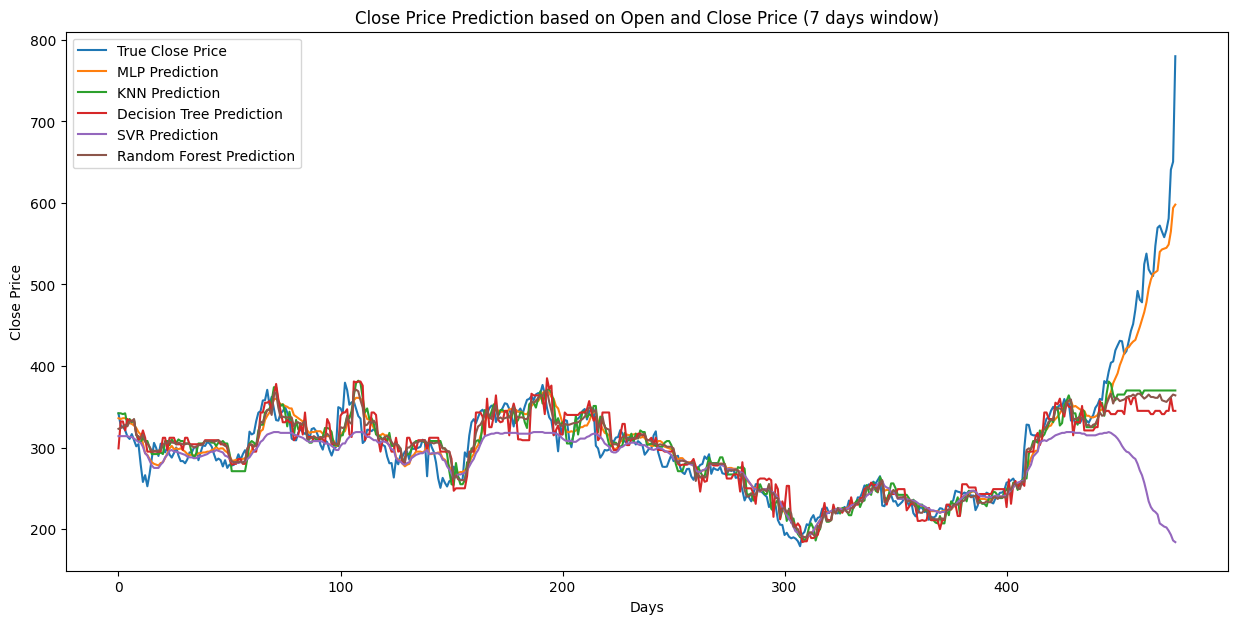

In [14]:
# visualisasi hasil prediksi
plt.figure(figsize=(15, 7))
plt.plot(test_close[window_size:], label='True Close Price')
plt.plot(y_pred_mlp, label='MLP Prediction')
plt.plot(y_pred_knn, label='KNN Prediction')
plt.plot(y_pred_dt, label='Decision Tree Prediction')
plt.plot(y_pred_svr, label='SVR Prediction')
plt.plot(y_pred_rf, label='Random Forest Prediction')
plt.ylabel('Close Price')
plt.xlabel('Days')
plt.title('Close Price Prediction based on Open and Close Price (7 days window)')
plt.legend()

In [15]:
# hasil evaluasi model
print('------------------------------------------------')
print('MLP RMSE: ', rmse_mlp)
print('MLP Correlation: ', corr_mlp)
print('------------------------------------------------')
print('KNN RMSE: ', rmse_knn)
print('KNN Correlation: ', corr_knn)
print('------------------------------------------------')
print('Decision Tree RMSE: ', rmse_dt)
print('Decision Tree Correlation: ', corr_dt)
print('------------------------------------------------')
print('SVR RMSE: ', rmse_svr)
print('SVR Correlation: ', corr_svr)
print('------------------------------------------------')
print('Random Forest RMSE: ', rmse_rf)
print('Random Forest Correlation: ', corr_rf)
print('------------------------------------------------')

------------------------------------------------
MLP RMSE:  20.296503343702916
MLP Correlation:  0.9635679602571396
------------------------------------------------
KNN RMSE:  44.327235098312045
KNN Correlation:  0.8082761107308887
------------------------------------------------
Decision Tree RMSE:  49.64929387682484
Decision Tree Correlation:  0.7424442535169622
------------------------------------------------
SVR RMSE:  73.94344350454668
SVR Correlation:  0.30024872609524
------------------------------------------------
Random Forest RMSE:  45.33960563038555
Random Forest Correlation:  0.8008834767451258
------------------------------------------------


# MLP yang Terbaik dalam memprediksi target (close) 2 hari kedepan, dengan menggunakan data close dan open 7 hari sebelumnya

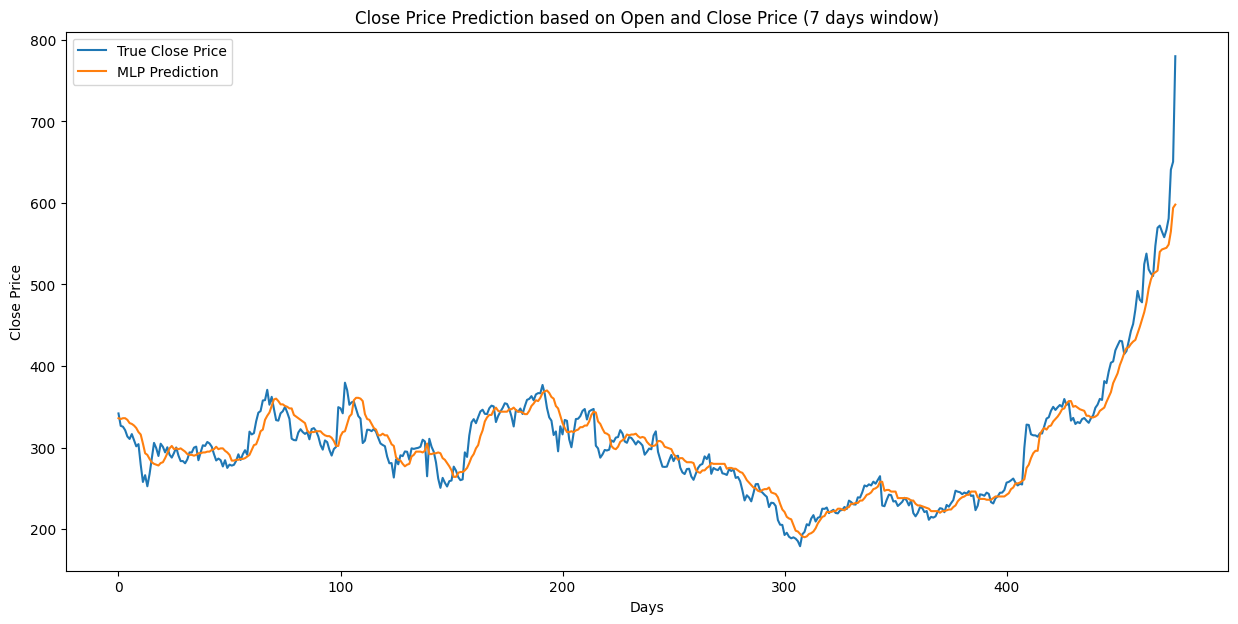

In [16]:
# visualisasi perbandingan MLP dan real data karena memiliki RMSE terendah dan correlation tertinggi
plt.figure(figsize=(15, 7))
plt.plot(test_close[window_size:], label='True Close Price')
plt.plot(y_pred_mlp, label='MLP Prediction')
plt.ylabel('Close Price')
plt.xlabel('Days')
plt.title('Close Price Prediction based on Open and Close Price (7 days window)')
plt.legend()
plt.show()